# Introduction
- Filters are used remove noise or undesirable impurities.
- The 1st and 2nd derivative filters are used to determine edges in an image
## There are two types of Filters:-
 Linear Filters
 Non- Linear Filters
 
 ### Linear Filters
     * Mean, Laplacian and Laplacian of Gausaian 
 ### Non-linear Filters
     * Medain, Maximum, minimum, Sobel, Prewitt and Canny filiters
     
 

***
Image enhancement can be accomplish in Spatial and Frequency domains
> 1.The Spatial domian constitutes all the pixels in an image. Distances in the images (pixel) corresponds to real distances in micrometers, inches etc.

> 2.The domain over which the Fourier transformation of an image ranges is known as Frequency domain of the image.


For  __Filtering__ a *filter or mask* is used. It is a two dimensional window that moves across the image affecting only one pixel at a time. Each number in the filter is known as coefficient. The coefficient in the filter determine the effects of the filter and consequently the output image. 
- We slide the window over the image (convolution) in the spatial domain to see the effect. Since the filter plays an important role in the convolution it is called the convolution kernel.

***
By using __Padding__ we can add values( __either 0 or a constant value, nearest neighbor or reflect__) to the image boundary prior to the convolutionand void losing the original values of the image.



## Mean Filter


In [11]:
# pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import scipy.ndimage
from PIL import Image
# from scipy.misc.pilutil import Image Deprecated
import matplotlib.pyplot as plt

1.7.1


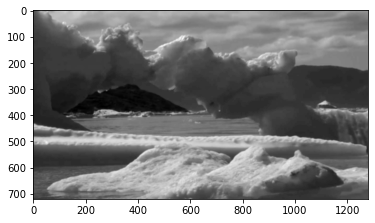

In [26]:
# Opening and converting the image into greyscale
a = Image.open('i.jpg').convert('L')
# Showing the image
plt.show(a)
#initialize the filter of size 5x5, and normalize it 
k =np.ones((5,5))/25

#Performing convolution
b=scipy.ndimage.filters.convolve(a,k)

# b is converted from an ndarray to an image
# b = scipy.misc.toimage(b) Deprecated
b = Image.fromarray(b)




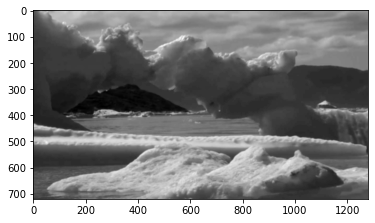

In [28]:
# Showing the image after applying the filter
plt.imshow(b,cmap='gray')
# Saving the image
b.save('mean_output.png')

### Advantage of the mean filter
> * Removes noise
> * Enhances the overall qaulity of the image. i.e mean filter brightens an image

### Disadvatanges of the mean filter
> * In the process of smoothing, the edges get blurred
> * Reduces the spatial resolution of the image

***
## Median Filter

*Most commenly used for removing salt-and-pepper and impluse noise. Salt-and-pepper noise is characterized by black and white spots randomly distributed in an image.*

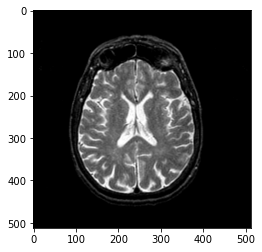

In [57]:
# Opening the image and no need to convert (already greyscale)

aa = Image.open('../../Images/Images/12.gif').convert('L')
plt.imshow(aa)

a=Image.open('../../Images/Images/12.gif')
plt.imshow(a)

# print(f"Checking properties:\nImage size {a.size}\nImage dimensions {a.shape}")

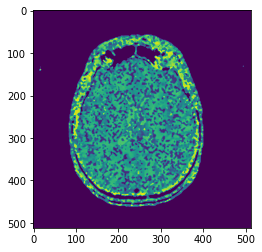

In [58]:
# Performing the median filter
b = scipy.ndimage.filters.median_filter(a,size=5, footprint=None, output=None, mode='reflect',cval=0.0,origin =0)
plt.imshow(b)

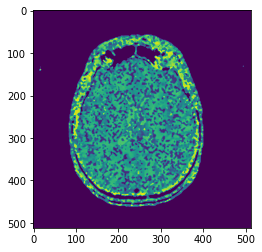

In [59]:
# b is converted from an ndarray to an image
b=Image.fromarray(b)
plt.imshow(b)

b.save('median_filter12.png')

## Max filter
enhances the bright points in an image. 

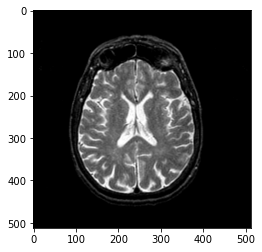

In [60]:
# Opening the image and no need to convert (already greyscale)

aa = Image.open('../../Images/Images/12.gif').convert('L')
plt.imshow(aa)

a=Image.open('../../Images/Images/12.gif')
plt.imshow(a)



In [78]:
b = scipy.ndimage.filters.maximum_filter(a,size=5,footprint=None, output=None, mode='reflect')

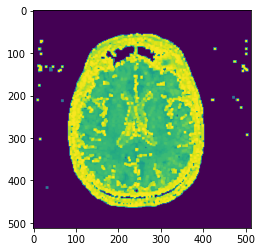

In [79]:
b = Image.fromarray(b)
plt.imshow(b)
b.save('max_filter12.gif')

## Min Filter
enhances the darkest points in an image.


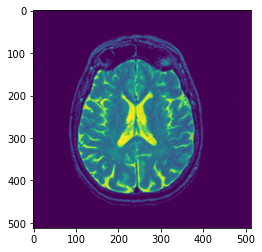

In [67]:
# Opening the image and no need to convert (already greyscale)

aa = Image.open('../../Images/Images/12.gif').convert('L')
plt.imshow(aa)

a=Image.open('../../Images/Images/12.gif')


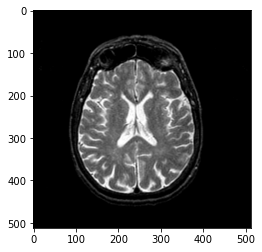

In [92]:
plt.imshow(a)

In [93]:
b = scipy.ndimage.filters.minimum_filter(a, size=5)

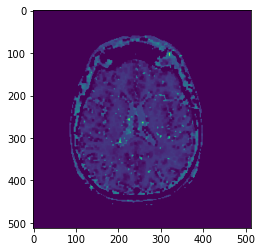

In [94]:
b = Image.fromarray(b)
plt.imshow(b)
b.save('min_filter12.gif')

# Edge detection using derivatives
> *Edges are a set of points in an image where there is a change of
intensity.
> * From calculus, we know that the changes in intensity can
be measured by using the first or second derivative.


### First Derivative Filters
*An image is not a continuous function and hence derivatives are
calculated using discrete approximations. Let us look at the definition
of gradient of a continuous function and then extend it to discrete cases.
If f(x, y) is a continuous function, then the gradient of f as a vector/

For computational purposes, we consider the simplified version of
the gradient is given by Equation 4.5 and angle is given by Equation

                |∇f| = |fx| + |fy|
                θ = tan−1

__One of the most popular first derivative filters is the Sobel filter.__


The important features of the Sobel filter are:
> * The sum of the coefficients in the mask image is 0. This means
that the pixels with constant grayscale are not affected by the
derivative filter.
> * The side effect of derivative filters is creation of additional noise.
Hence, coefficients of +2 and −2 are used in the mask image to
produce smoothing.


* Another first derivative filter is __Prewitt__.


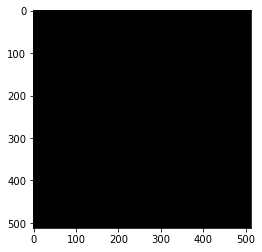

In [95]:
from skimage import filters
img = Image.open('../../Images/Images/20.gif').convert('L')
b =  filters.sobel(a)
b= Image.fromarray(b)

plt.imshow(b)
b.save('20Sobel.gif')

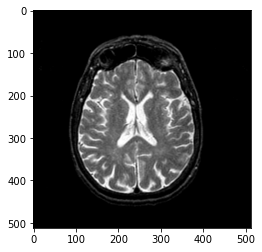

In [96]:
plt.imshow(a)

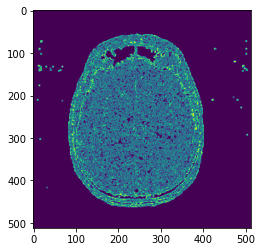

In [97]:
c = filters.prewitt(a,mask=None)
plt.imshow(c)

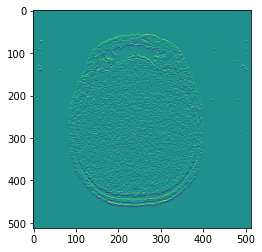

In [99]:
d= filters.prewitt_h(a, mask=None)
plt.imshow(d)

### Canny filter
1. The input of the Canny filter is a grayscale image.
2. A Gaussian filter is used on the image for smoothing.
3. An important property of an edge pixel is that it will have a maximum gradient magnitude in the direction of the gradient
4. At the edge points, the first derivative will have either a minimum or a maximum. This implies that the magnitude (absolute value) of gradient of the image at the edge points is maximum. We will refer to these points as ridge pixels. To identify edge points and suppress others, only ridge tops are retained and other pixels are assigned a value of zero. This process is known as non-maximal suppression.
5. Two thresholds, low threshold and high threshold, are then used to threshold the ridges. Ridge pixel values help to classify edge pixels into weak and strong. Ridge pixels with values greater than t5. Two thresholds, low threshold and high threshold, are then used to threshold the ridges. Ridge pixel values help to classify edge pixels into weak and strong. Ridge pixels with values greater than
6. In the last step, the weak edge pixels are 8-connected with strong edge pixels.
 

In [106]:
img2 = Image.open('../../Images/Images/23.gif').convert('L')
b =  filters.apply_hysteresis_threshold(img2,1.5, 2.5).astype(int)
b= Image.fromarray(b)

plt.imshow(b)
b.save('23canny.gif')

TypeError: '>' not supported between instances of 'Image' and 'float'

# Second Derivative Filters

 > In this filter, the second derivative is computed in order to determine the edges. One of the most popular second derivative filters is the
__Laplacian__. 


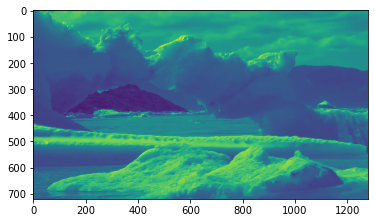

In [111]:
# img3 = Image.open('../../Images/Images/23.gif').convert('L')
img3=Image.open('i.jpg').convert('L')
b =  filters.laplace(img3)
b= Image.fromarray(b)
plt.imshow(img3)
# plt.imshow(b)
b.save('laplaceon_i.gif')

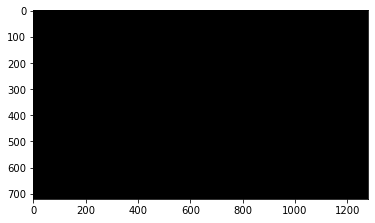

In [119]:
plt.imshow(b)

In [125]:
img3=Image.open('i.jpg').convert('L')
b =  filters.gabor_kernel(img3,mode='nearest')
b= Image.fromarray(b)
# plt.imshow(img3)
plt.imshow(b)
b.save('gaussain_laplaceon_i.gif')

TypeError: gabor_kernel() got an unexpected keyword argument 'mode'

# Summary
> The mean filter smoothens the image while blurring the edges in
the image.

> The median filter is effective in removing salt and pepper noise.

> The most widely used first derivative filters are Sobel, Prewitt
and Canny.

> Both Laplacian and LoG are popular second derivative filters.

# The end of chpt 4